# Corso di Probabilità e Statistica - La distribuzione binomiale

In questo capitolo introduciamo la distribuzione binomiale


In [1]:
import scipy.stats as stats #modulo di statistica
import numpy as np
import matplotlib.pyplot as plt

**Generiamo un processo binomiale empiricamente**

In [21]:
#parametri
n=20
p=0.5
NR=100 #numero di realizzazioni del processo

In [22]:
bd = np.zeros(n+1) #inizializzazione

In [23]:
for i in range(NR): #loop sulle realizzazioni
    k=0 #k numero di successi
    for j in range(n): #loop su n
        x=np.random.rand() 
        if(x<p):
            k=k+1 
    bd[k]=bd[k]+1 

In [24]:
bd=bd/NR #normalizzazione

**Confrontiamo il risultato empirico con la distribuzione binomiale teorica**

In [25]:
bd1 = stats.binom(n, p) #distribuzione binomiale

In [26]:
# confrontiamo i valori di B_p^n(k)
k=5
bd[k],bd1.pmf(k)

(0.01, 0.014785766601562429)

In [27]:
# confrontiamo le media
mu1=bd1.mean()
mu=np.average(np.arange(n+1),weights=bd) #media pesata sulla distribuzione empirica 
mu,mu1

(10.18, 10.0)

In [28]:
# confrontiamo la varianza
sigma2_1=bd1.var()
sigma2=np.average(np.arange(n+1)**2,weights=bd)-mu**2
sigma2,sigma2_1

(5.027600000000021, 5.0)

In [29]:
# calcoliamo i momenti
r=3
mom1=bd1.moment(n=r)
mom=np.average(np.arange(n+1)**r,weights=bd)
mom1,mom

(1150.0, 1206.7)

**Grafici**

In [30]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

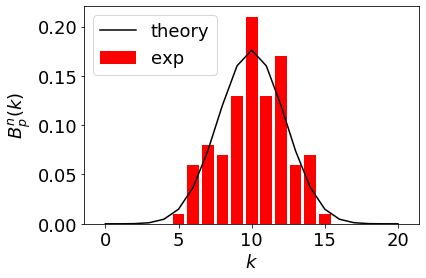

In [35]:
k = np.arange(n+1)
plt.plot(k, bd1.pmf(k), label="theory", color="black") #linee
plt.bar(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

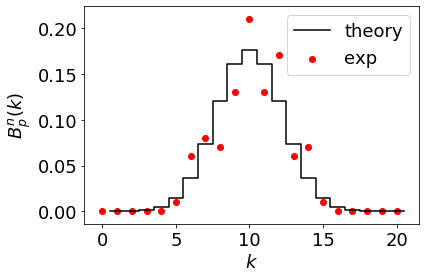

In [34]:
k = np.arange(n+1)
plt.step(k+.5, bd1.pmf(k), label="theory", color='black') #linee
plt.scatter(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()